# 📊 Analysis: Column Mapping Justification

This notebook explores the statistical and structural relationships between the columns to justify the inferred mapping.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data.csv")
df.describe()

,deltaX,gamma,omega,flux,pulse,neutronCount
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,95.209593,95.402143,95.016844,95.209804,95.209737,50541.730472
std,103.796442,103.796594,103.797184,103.797320,103.796308,28578.459770
min,-211.728008,-211.323966,-211.882648,-211.767355,-211.500164,1000.000000
25%,39.445254,39.632531,39.242162,39.438783,39.449301,25810.000000
50%,114.096853,114.286186,113.906685,114.114242,114.092463,50604.000000
75%,175.434137,175.621276,175.241753,175.425143,175.434474,75257.000000
max,286.705521,286.709571,286.513061,286.549948,286.466974,99999.000000


### 🔍 Step 1: Identifying Volume

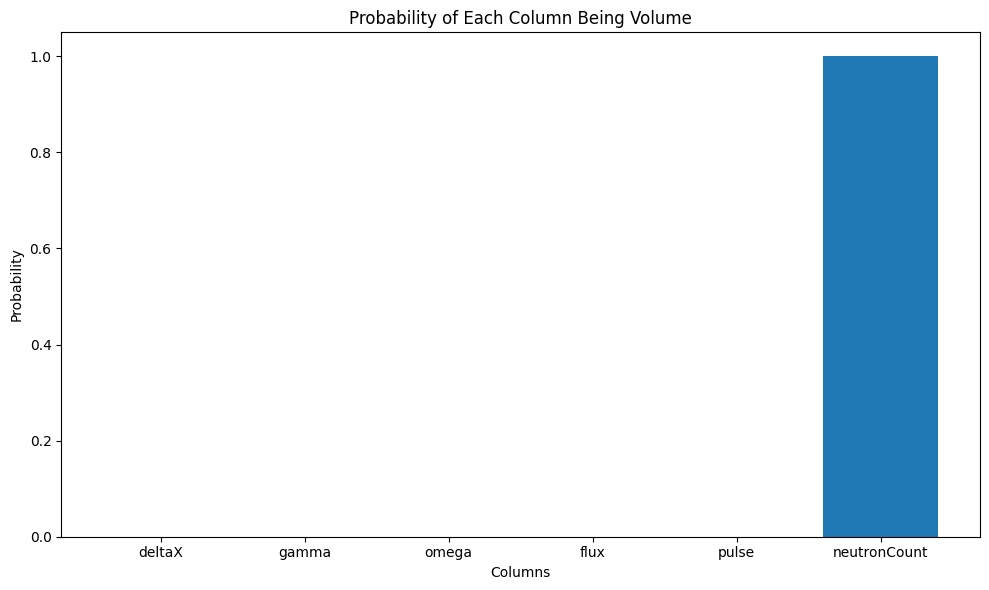

Thus, Column neutronCount is the most likely candidate for volume with confidence 1.0


In [31]:
volume_counts = {}
for col in df.columns:
    volume_counts[col]=0

for index,row in df.iterrows():
    candidates = []
    for col in df.columns:
        value = row[col]
        if value > 0 and value == int(value):
            candidates.append(col)
    if candidates:
        max_value = 0
        best_col = None
        for col in candidates:
            if row[col] > max_value:
                max_value = row[col]
                best_col = col
        volume_counts[best_col] += 1
                    
for col,count in volume_counts.items():
    volume_counts[col] = count / len(df)
max_column_volume = max(volume_counts, key=volume_counts.get)
max_confidence = volume_counts[max_column_volume]

plt.figure(figsize=(10, 6))
plt.bar(volume_counts.keys(), volume_counts.values())
plt.title('Probability of Each Column Being Volume')
plt.xlabel('Columns')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

print(f"Thus, Column {max_column_volume} is the most likely candidate for volume with confidence {max_confidence}")

### 🔍 Step 2: Correlation Analysis

In [32]:
# Add your logic for the correlation here and display the matrix as required

### 🔍 Step 3: Row-wise Statistics inference (as applicable)

Columns: ['deltaX', 'gamma', 'omega', 'flux', 'pulse', 'neutronCount']
Column deltaX is largest 0 times and smallest 0 times
Column gamma is largest 432559 times and smallest 0 times
Column omega is largest 0 times and smallest 432906 times
Column flux is largest 0 times and smallest 0 times
Column pulse is largest 67441 times and smallest 67094 times
Avg volume when pulse is high: 50227.33
Avg volume when pulse is low: 50543.68
Double max: 0 times, Double min: 0 times


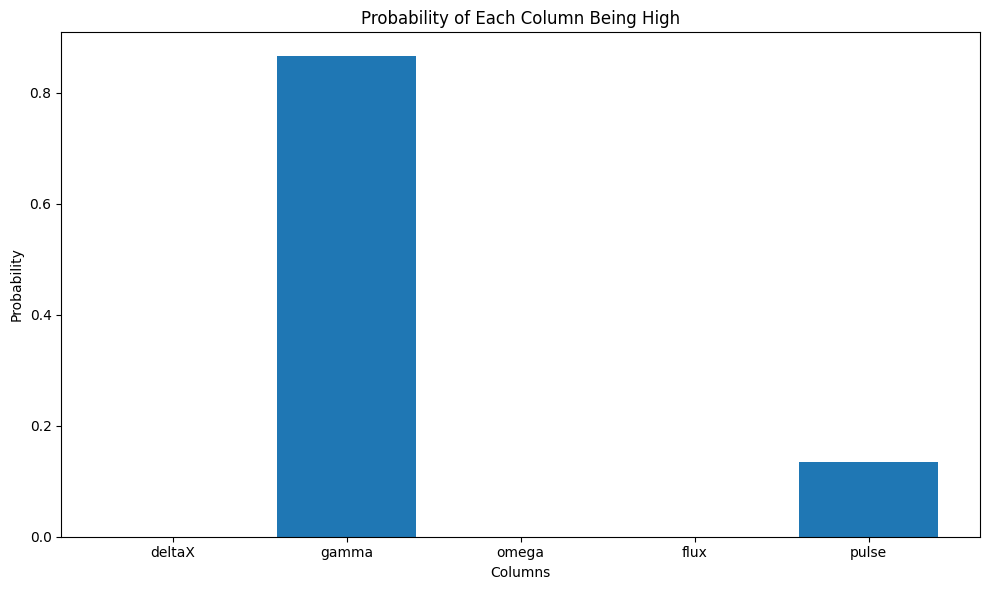

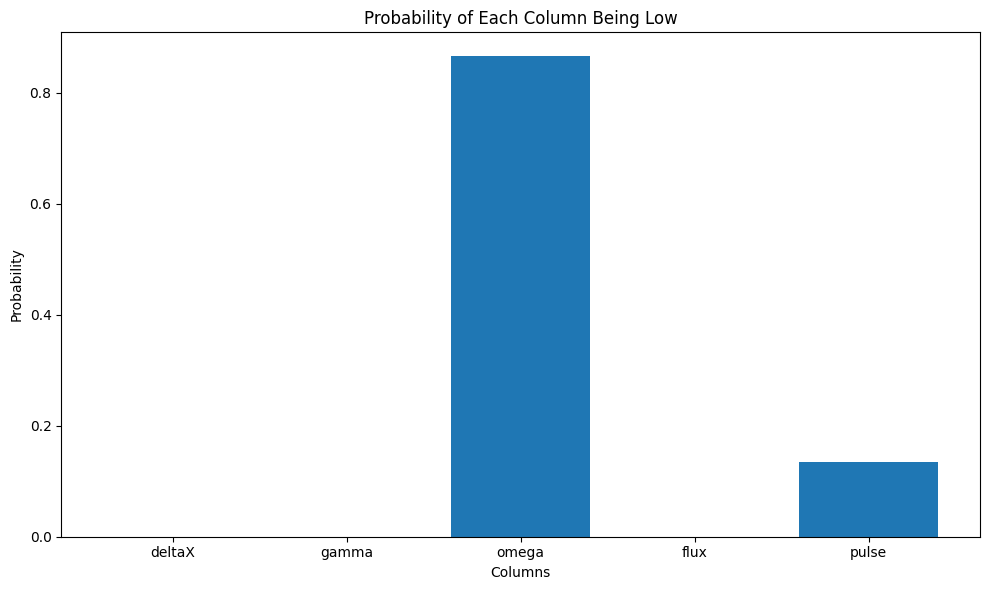

In [ ]:
columns = df.columns.tolist()
print("Columns:", columns)

filtered_columns = [col for col in columns if col != max_column_volume]
larger = {}
smaller = {}
vol_pulse_large = 0
vol_pulse_small = 0
double_max = 0
double_min = 0
for col in filtered_columns:
    larger[col] = 0
    smaller[col] = 0
for index,row in df.iterrows():
    max_value = -212
    min_value = 290
    max_col = None
    min_col = None
    for col in filtered_columns:
        if max_value < row[col]:
            max_value = row[col]
            max_col = col
        if min_value > row[col]:
            min_value = row[col]
            min_col = col
    larger[max_col] += 1
    smaller[min_col] += 1
    if max_col == "pulse":
        vol_pulse_large += row[max_column_volume]
    if min_col == "pulse":
        vol_pulse_small += row[max_column_volume]

for col in filtered_columns:
    print(f"Column {col} is largest {larger[col]} times and smallest {smaller[col]} times")

print(f"Avg volume when pulse is high: {vol_pulse_large / larger['pulse']:.2f}")
print(f"Avg volume when pulse is low: {vol_pulse_small / smaller['pulse']:.2f}")

for col in filtered_columns:
    larger[col] = larger[col] / len(df)
    smaller[col] = smaller[col] / len(df)

large_price = 0
max_col_high = None
max_col_low = None
small_price = 0
for col in filtered_columns:
    if large_price < larger[col]:
        large_price = larger[col]
        max_col_high = col
    if small_price < smaller[col]:
        small_price = smaller[col]
        max_col_low = col

plt.figure(figsize=(10, 6))
plt.bar(larger.keys(), larger.values())
plt.title('Probability of Each Column Being High')
plt.xlabel('Columns')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(smaller.keys(), smaller.values())
plt.title('Probability of Each Column Being Low')
plt.xlabel('Columns')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

Rows with 1 negative values: 39
Rows with 2 negative values: 72
Rows with 3 negative values: 75
Rows with 4 negative values: 43
Rows with 5 negative values: 78787
Rows with 6 negative values: 0


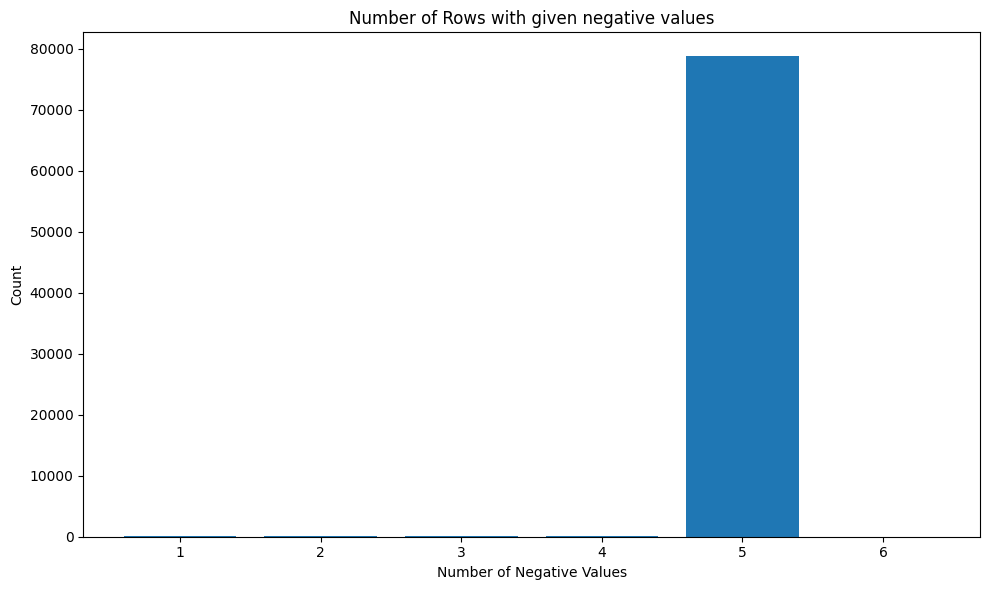

In [ ]:
for index,row in df.iterrows():
    possible_price = 

### 📈 Step 4: Candlestick Visual from Mapped Fields

In [34]:
# Add your logic here
# . . . .
# sample[['open', 'high', 'low', 'close']].plot(figsize=(12,6), title='Candlestick Field Preview')
# plt.show()

This confirms the structural pattern of price movement and supports the inferred mapping.